# Coronavirus COVID-19 - mathematical modelling and crucial data points

In [1]:
import CoronaLib as cl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [2]:
cl.testfunction()

Import successful
3.141592653589793


# Theoretical Background

## Exponential Growth
Viral epidemics are a textbook example of exponential growth. Exponential growth is by definition growth, where over a certain period of time the number of cases is multiplied by a certain factor. This factor does not change over time, which already is a first sign that maybe it's not the most realistic model. Another sign could be that long term the number of cases would grow bigger than the worlds population.

In the case of Viruses the number of cases $N$ on a given day $t$ directly depends on the number of cases the day before. For every infected person there is an expected number $E$ of people they interact with and a probability $p$ with which the interaction leads to an infection. Thus the change in number of cases:
\begin{align}
\Delta N(t) = E*p*N(t)
\end{align}
Or in other words the number of cases the next day would be:
\begin{align}
N(t+1) = \Delta N(t) + N(t) = E*p*N(t) + N(t) = (1+E*p)*N(t)
\end{align}
So the factor with which we multiply daily is $(1+E*p)$. Assuming there is a day "0", where $N(t)=N(0)$, this means that the number of cases on any given day is discribed by:
\begin{align}
N(t) = (1+E*p)^{t}*N(0)
\end{align}
Since any **number** of cases is discrete, we can assume this number is one, meaning that there was a "first case", leading to an description:
\begin{align}
N(t) = (1+E*p)^{t} = (e^{k})^{t} = e^{k*t}
\end{align}
Having this model, we model a **discrete** process **continously**. And we can also differentiate. This means, we can approximate $\Delta N(t)$ by differentiating $N(t)$:
\begin{align}
\frac{dN(t)}{dt} = k*e^{k*t} = k*N(t)
\end{align}
We again see, that the growth rate directly depends on the number of cases themselves. (This is called a differential equation)

However, neither the number of people E we interact with on a daily basis, nor the probability p that we infect them, are constant. As a matter of fact, those are the two factors, by which the growth is determined an **we can influence the growth rate!** We can lower the number of people we interact with, by staying at home, travelling less and avoiding neat contact. Also, we can lower the probability of infection by washing our hands etc. That is, why these measures are so important. The effect a little change in those factors can have on the total number of cases is absolutely immense. For example, having $Ep = 0.05, 0.1, 0.15, 0.2$ and the current estimate for $Ep = 0.28$ has tremendous effects on the development over time:

In [3]:
growthfactors = widgets.SelectMultiple(options=[0.05, 0.1, 0.15, 0.2, 0.28],value=[0.05, 0.1, 0.15, 0.2, 0.28],description='k:',disabled=False)
days_after_zero = widgets.IntSlider(value = 20,min = 0,max = 60,description='days',continuous_update=False) 
w = interactive(cl.exampleexp, f=growthfactors,afterdays=days_after_zero)
display(w)

interactive(children=(SelectMultiple(description='k:', index=(0, 1, 2, 3, 4), options=(0.05, 0.1, 0.15, 0.2, 0…

Even after a few days, the total number of infected people differs extremely: One can barely see the chart at 0.05 and 0.1. That is, because in comparison to the factors 0.15 and 0.2 there is just such an immense difference longterm. And the difference between 0.2 and 0.28 is very much achievable through the measures introduced by the WHO and other organizations.

## Logistic Growth
Another effect that leads to the factor $(1+Ep)$ decreasing is, that after a while the infected people will start interacting with already infected people, decresing the probability that for any interaction a new person gets infected.
We can implement this in our model by introducing an factor, that tends towards zero when the proportion of infected people tends towards one:
\begin{align}
\Delta N(t) = (1-\frac{N(t)}{L})*E*p*N(t)
\end{align}
Since our goal is to model this continously, we can describe this fact by a differential equation:
\begin{align}
\frac{dN(t)}{dt} = (1-\frac{N(t)}{L})*E*p*N(t)
\end{align}
where $L$ is the population size **or** the maximum number of cases. Through isolation of individuals or herd immunity these can be two different numbers. Without going into detail on how to solve (partial) differential equations, we can have a look at the solution of this equation, the **logistic growth model**.:
\begin{align}
N(t) = \frac{L}{1+e^{-kt}}
\end{align}
$k$ again arising from mathematical manipulation and being in direct dependency of $E$ and $p$. The corresponding curves with the same inital growthfactors $Ep$ but different upper boundaries looks like this:

In [4]:
growthfactors2 = widgets.SelectMultiple(options=[0.05, 0.1, 0.15, 0.2, 0.28],value=[0.05, 0.1, 0.15, 0.2, 0.28],description='k:',disabled=False)
casemax = widgets.SelectMultiple(options=[83000000,58000000 ,50000000, 25000000, 17000000],value=[83000000,58000000 ,50000000, 25000000, 17000000],description='L:',disabled=False)
days_after_zero2 = widgets.IntSlider(value = 400,min = 0,max = 600,description='days',continuous_update=False) 
v = interactive(cl.examplelogistic,L = casemax, k=growthfactors2,howlong=days_after_zero2)
display(v)

interactive(children=(SelectMultiple(description='L:', index=(0, 1, 2, 3, 4), options=(83000000, 58000000, 500…

It is important to note, that with slower spread also the maximum number of cases decreases. However, in this scenario the numbers are (for now) made up.  

So far, we have looked at the **number of cases $N(t)$**, meaning the number of people who **have** the virus or **had** it and have passed away or recovered. Since recent research shows, that having recovered, one is not infectious anymore and cannot be infected anymore, it does not make sense to still count those people. Thus, me must account for an recoveryrate to see the **number of active cases $A(t)$**. We do this by estimating the average recovery time $r$ and subtracting the number of cases from that many days ago:
\begin{align}
A(t) = N(t) - N(t-r) = \frac{L}{1+e^{-kt}} - \frac{L}{1+e^{-k(t-r)}}
\end{align}
The curve looks something like this:

In [5]:
growthfactors3 = widgets.SelectMultiple(options=[0.05, 0.1, 0.15, 0.2, 0.28],value=[0.05, 0.1, 0.15, 0.2, 0.28],description='k:',disabled=False)
L = [83000000,83000000,83000000,83000000,83000000]
days_after_zero3 = widgets.IntSlider(value = 300,min = 0,max = 600,description='days',continuous_update=False) 
recoverytime3 = widgets.IntSlider(value = 14,min = 0,max = 100,description='recoverytime',continuous_update=False)
w3 = interactive(cl.examplerecovery,L = widgets.fixed(L), k=growthfactors3,howlong=days_after_zero3,recoverytime = recoverytime3)
display(w3)

interactive(children=(SelectMultiple(description='k:', index=(0, 1, 2, 3, 4), options=(0.05, 0.1, 0.15, 0.2, 0…

This is the curve, that experts talk about, when saying "We have to flatten the curve". We can tell that by having a smaller growthfactor $k$ we do exactly that: we flatten the curve. This is significant, because only the **active cases** are the ones that stress the national health care systems. So, though the number of confirmed cases might not change, the maximal number of active cases at any time can be decreased significantly.


blue models exponential growth, orange models logistic growth and green models logistic growth considering the recovery of patients.  
Note that in the beginning all models behave extremely similarly. That is why often we talk about exponential growth concerning the spread of COVID-19. However, longterm the other models are more sensical.

In [6]:
growthfactor4 = widgets.FloatSlider(value=0.15,min = 0.01,max=1,step=0.01,description='growthrate',continuous_update=False)
casemax4 = widgets.IntSlider(value=83000000,min = 1,max=83000000, description='casemax',continuous_update=False)
recoverytime4 = widgets.IntSlider(value = 14,min = 0,max = 200,description='recoverytime',continuous_update=False)
days_after_zero4 = widgets.IntSlider(value = 365,min = 0,max = 600,description='days',continuous_update=False)
w4 = interactive(cl.examplegrowth,L = casemax4, k=growthfactor4,howlong=days_after_zero4,recoverytime = recoverytime4)
display(w4)

interactive(children=(FloatSlider(value=0.15, continuous_update=False, description='growthrate', max=1.0, min=…

As long as the percentage of cases compared to the total population is relatively small, the exponential and logistic model are extremely similar. That is why often people say, that the numbers are growing exponentally.

## Prenotes

We will look at the data from the John Hopkins University (https://github.com/CSSEGISandData/COVID-19). The data starts at the 22nd of january 2020. We will consider this date our "day 0". The Data can be updated by downloading a new file "cases.txt" and "deaths.txt". In our model **we do not consider any data from the USA**, because different reporting methods demolish comparability and interpretability. When reading any paper/website produced through this jupyter notebook **check when it was published**, as it will only include data up to that point. The Author does not guarantee correctness, effectiveness, sensibility or any other academic standard. However, he tries his best to give an objective data representation, visualisation and interpretation.

In [7]:
data = np.genfromtxt('cases.txt', delimiter = ',')

# Covid - 19: Exponential Model
## Global Case Number (GCN)

The global case number is simply the number of confirmed cases per country summed up: The progression looks like this:

In [8]:
period5 = widgets.IntRangeSlider(value=[0,len(data[0])],min=0,max=len(data[0]),description='period',continous_update=True)
w5 = interactive(cl.plotglobal,period=period5,data=widgets.fixed(data))
display(w5)

interactive(children=(IntRangeSlider(value=(0, 68), description='period', max=68), Output()), _dom_classes=('w…

The jump around the 21 day is caused by changing counting methods and doesnt have anything to do with actual increse in numbers. Zero is the 22nd of January 2020. We will do an exponential regression in order to determine how well the GCN is described through exponential growth:

In [9]:
period6 = widgets.IntRangeSlider(value=[0,len(data[0])],min=0,max=len(data[0]),description='period',continuous_update=False)
certainty6 = widgets.FloatSlider(value=0.5,min=0,max=1,description='certainty',continuous_update=False)
w6 = interactive(cl.expregglobal,period=period6,data=widgets.fixed(data),certainty=certainty6)
display(w6)

interactive(children=(IntRangeSlider(value=(0, 68), continuous_update=False, description='period', max=68), Fl…

Overall, the GCN does follow an exponential trend. Howeverthere is a "bump" around the 21 day, because the global numbers were only china's numbers really at the very beginning. Thus, the exponential looks better, when we start around the 45th day, where the virus spread to most other countries of the world:

In [10]:
period7 = widgets.IntRangeSlider(value=[0,len(data[0])],min=0,max=len(data[0]),description='period',continuous_update=True)
country7 = widgets.Dropdown(value=64,options=[('Hubei, China', 64),('Germany', 122), ('Iran', 135), ('Italy', 139),('Japan', 141),('Spain', 203),('UK', 225),('US', 227)],description='country')
w7 = interactive(cl.compare_global_country,period=period7,data=widgets.fixed(data),country_index=country7)
display(w7)

interactive(children=(IntRangeSlider(value=(0, 68), description='period', max=68), Dropdown(description='count…

## Country Case Number (CCN)
Chose the country index in reference to the john hopkins unversities data set.

In [11]:
period8 = widgets.IntRangeSlider(value=[0,len(data[0])],min=0,max=len(data[0]),description='period',continuous_update=False)
country8 = widgets.Dropdown(value=122,options=[('Hubei, China', 64),('Germany', 122), ('Iran', 135), ('Italy', 139),('Japan', 141),('Spain', 203),('UK', 225),('US', 227)],description='country')
w8 = interactive(cl.plotcountry,period=period8,data=widgets.fixed(data),country_index=country8)
display(w8)

interactive(children=(Dropdown(description='country', index=1, options=(('Hubei, China', 64), ('Germany', 122)…

To begin with, we will have a look at all of the data.A Simple linear regression gives us this best fit exponential:

In [12]:
period9 = widgets.IntRangeSlider(value=[30,len(data[0])],min=0,max=len(data[0]),description='period',continuous_update=False)
country9 = widgets.Dropdown(value=122,options=[('Hubei, China', 64),('Germany', 122), ('Iran', 135), ('Italy', 139),('Japan', 141),('Spain', 203),('UK', 225),('US', 227)],description='country')
certainty9 = widgets.FloatSlider(value=0.5,min=0,max=1,description='certainty',continuous_update=False)
w9 = interactive(cl.expregcountry,period=period9,data=widgets.fixed(data),country_index=country9,certainty=certainty9)
display(w9)

interactive(children=(Dropdown(description='country', index=1, options=(('Hubei, China', 64), ('Germany', 122)…

The main reason this fit is rather bad for some countries, is, that by including Data from early on (January/early febuary) we have a lot of "zero" values. In an exponential modelling, having "zero" values makes no sense. This is, because when analyzing discrete data with continous methodologies / models a sort of "rounding" effect takes place. So lets see, how our model performs, when we cut earlier data.

Clearly, our exponential model performs much better, as the average deviation is a lot smaller, in particular in the period, where non-zero values are present.  
We learn, that considering data from too early on makes no sense, because we have too many zero values, but also considering data for too long of a period makes no sense, because the exponential model only fits the beginning of an outbreak. So our hypothesis is proven to be right. The exponential model only makes sense for certain periods of an epidemic.   

### Actual case numbers (ACN) and prediction

There are many factors, why the confirmed case number does not represent the actual number of infected cases. For one, the incubation period is on average six days. And since most people only are tested, when they show the first symptoms, this adds a delay of six days. On average, the test takes about 2 days to be carried out.
Another factor is a delay in report of approximately 2 days (in Germany, source: Robert-Koch-Institut). Thus, we have an **average delay of 10 days!**. In terms of exponential growth, this is a huge difference!  
Additionally, there are a lot of people who will either not have any symptoms and thus won't be tested or can't be tested, because of the national capacity for testing. Thus, we can expect the number to be even higher. However, we cannot make any serious calculations. 
So, we can only take some factors into consideration when calculating the **actual case number** today. This number is always the same as our predicted confirmed number in 10 days will be:

In [13]:
period10 = widgets.IntRangeSlider(value=[30,len(data[0])],min=0,max=len(data[0]),description='period',continuous_update=False)
country10 = widgets.Dropdown(value=122,options=[('Hubei, China', 64),('Germany', 122), ('Iran', 135), ('Italy', 139),('Japan', 141),('Spain', 203),('UK', 225),('US', 227)],description='country')
certainty10 = widgets.FloatSlider(value=0.5,min=0,max=1,description='certainty',continuous_update=False)
verzug10 = widgets.IntSlider(value=10,min=0,max=20,description='delay',continuous_update=False)
time10 = widgets.IntSlider(value=40,min=0,max=200,description='prediction',continuous_update=False)
w10 = interactive(cl.expprogcountry,time=time10,verzug=verzug10,period=period10,data=widgets.fixed(data),country_index=country10,certainty=certainty10)
display(w10)

interactive(children=(Dropdown(description='country', index=1, options=(('Hubei, China', 64), ('Germany', 122)…

This number is a lot bigger that the confirmed case number today. However, we have to be very careful to consider this true. This model is way too simple and there are way too many factors determining the ACN.

# Covid-19: logistic model
## Country Case Number

In [14]:
period11 = widgets.IntRangeSlider(value=[35,len(data[0])],min=0,max=len(data[0]),description='period',continuous_update=False)
country11 = widgets.Dropdown(value=122,options=[('Hubei, China', 64),('Germany', 122), ('Iran', 135), ('Italy', 139),('Japan', 141),('Spain', 203),('UK', 225),('US', 227)],description='country')
casemaxin11 = widgets.IntSlider(value=1,min=1,max=83000000,continuous_update=False,description='maximum')
casemaxfactor11 = widgets.FloatSlider(value=2.0,min=1,max=20,step=0.1,continuous_update=False,description='factor')
w11 = interactive(cl.logregcountry,period=period11,data=widgets.fixed(data),country_index=country11,casemaxfactor=casemaxfactor11,casemaxin=casemaxin11)
display(w11)

interactive(children=(Dropdown(description='country', index=1, options=(('Hubei, China', 64), ('Germany', 122)…

# Case Fatality Rate (CFR)

The case fatality rate is defined as the proportion of **deaths of confirmed cases** in a country or globally (DCCN or DGCN) to the **confirmed cases**  of a country or globally (CCN or GCN) and thus differes a lot from the infected fatality rate. It is calculated like this and depends exptremely on where and when you are calculating it:  
\begin{align}
CFR = \frac{DCCN}{CCN}
\end{align}
or respectively:
\begin{align}
CFR = \frac{DGCN}{GCN}
\end{align}

How ever we can also make a more general estimation of the CFR. Assuming the CFR is constant, it makes sense to do a linear regression within the CCN and DCCN (or GCN and DGCN). We get another CFR than when looking at the CFR today: 

In [15]:
data1 = np.genfromtxt('deaths.txt', delimiter = ',')

In [16]:
period12 = widgets.IntRangeSlider(value=[0,len(data[0])],min=0,max=len(data[0]),description='period',continuous_update=False)
country12 = widgets.Dropdown(value=122,options=[('Hubei, China', 64),('Germany', 122), ('Iran', 135), ('Italy', 139),('Japan', 141),('Spain', 203),('UK', 225),('US', 227)],description='country')
w12 = interactive(cl.case_death_per_country,period=period12,cases=widgets.fixed(data),country_index=country12,deaths=widgets.fixed(data1))
display(w12)

interactive(children=(Dropdown(description='country', index=1, options=(('Hubei, China', 64), ('Germany', 122)…

Looking at the CFR in terms of CNN also has the advantage of detecting an increase (or decrease), which would indicate a breakdown in the healthcare system, **or** an accumulated effect through delay (It takes time to die). The fact, that different case numbers and different countries have different health care capaities can also be seen in the following comparison of the CFR today for different countries:

In [17]:
country13 = widgets.Dropdown(value=122,options=[('Hubei, China', 64),('Germany', 122), ('Iran', 135), ('Italy', 139),('Japan', 141),('Spain', 203),('UK', 225),('US', 227)],description='country')
w13 = interactive(cl.case_death_globally,cases=widgets.fixed(data),country_index=country13,deaths=widgets.fixed(data1))
display(w13)

interactive(children=(Dropdown(description='country', index=1, options=(('Hubei, China', 64), ('Germany', 122)…

This is also the reason, why the whole world is looking at italy in those difficult times.

[]


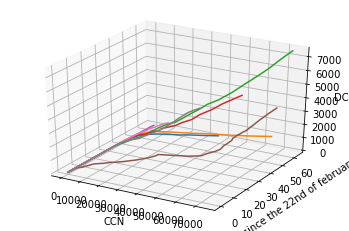

In [18]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
country_list = [122,227, 139, 203,141,64,225,135]
cl.threeD_case_death_time(country_list, data, data1)